## Notebook for the Epithelial Reference Map preparation (with Kong Stem cells)

- **Developed by**: Anna Maguza
- **Institute of Computational Biology - Computational Health Centre - Helmholtz Munich**
- 11th April 2023

### Import required moduls

In [1]:
import scanpy as sc

In [2]:
import numpy as np
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from geosketch import gs

In [3]:
from matplotlib import axes
from matplotlib import pylab

#### Setup Cells

In [4]:
%matplotlib inline

In [5]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi = 160, color_map = 'magma_r', dpi_save = 300, vector_friendly = True)

/Users/anna.maguza/miniconda3/envs/geosketch_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.3.5 scikit-learn==1.2.2 statsmodels==0.13.5 pynndescent==0.5.8


### Upload data

In [13]:
input = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Healthy_reference/GCA_Kong_Smillie_Wang_unprocessed/GCA_Kong_Wang_Smillie_raw.h5ad'
output = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Healthy_reference/GCA_Kong_Smillie_Wang_unprocessed/GCA_Kong_Wang_Smillie_raw_output.h5ad'
adata = sc.read_h5ad(input)

### Data Preprocessing

In [32]:
#Filter epithelial cells and stem cells
#Extract Healthy adult and non-inflamed data in anndata_adult object
cells_to_keep = ["Stem Cell", "Epithelial"]
epithelial_cells = adata.obs['Cell Type'].isin(cells_to_keep)
epithelial_cells = adata[epithelial_cells, :].copy()

In [33]:
epithelial_cells.obs

,Cell Type,batch,Sample_ID,n_genes,n_counts,Chem,Location,Donor_ID,Layer,Cell States,...,doublet_scores,predicted_doublets,Study_name,Age_group,Cell States Kong,UniqueCell_ID,Age,Region code,Fraction,Cell States GCA
cell_id,,,,,,,,,,,,,,,,,,,,,
H197396_N1-GCTTGAAGTCATGCCG,Epithelial,Kong,H197396_N1,4319,25850,v2,Colon,197396,N,Enterocytes CA1 CA2 CA4-,...,0.04549646480172149,False,Kong 2023,Adult,Enterocytes CA1 CA2 CA4-,nan,nan,nan,nan,nan
H197396_N1-AGGGAGTCACCTTGTC,Epithelial,Kong,H197396_N1,3892,21899,v2,Colon,197396,N,Enterocytes CA1 CA2 CA4-,...,0.01250656857593274,False,Kong 2023,Adult,Enterocytes CA1 CA2 CA4-,nan,nan,nan,nan,nan
H197396_N1-CATATTCAGGGAGTAA,Epithelial,Kong,H197396_N1,3772,20100,v2,Colon,197396,N,Enterocytes TMIGD1 MEP1A,...,0.016832014268197523,False,Kong 2023,Adult,Enterocytes TMIGD1 MEP1A,nan,nan,nan,nan,nan
H197396_N1-CGCTTCAAGGCTACGA,Epithelial,Kong,H197396_N1,3540,19798,v2,Colon,197396,N,Enterocytes CA1 CA2 CA4-,...,0.02563464410154306,False,Kong 2023,Adult,Enterocytes CA1 CA2 CA4-,nan,nan,nan,nan,nan
H197396_N1-CGGAGTCGTGAGTGAC,Epithelial,Kong,H197396_N1,3384,18693,v2,Colon,197396,N,Goblet cells MUC2 TFF1-,...,0.04206927307863833,False,Kong 2023,Adult,Goblet cells MUC2 TFF1-,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N110.LPA.TCGGGACGTCAACTGT,Stem Cell,GCA,N110.LPA,1232,4384,nan,LP,N110,nan,Stem_Cells_ext,...,nan,nan,Smilie,Adult,nan,nan,nan,nan,nan,Stem_Cells_ext
N110.LPA.TGAGCATTCCAGTAGT,Stem Cell,GCA,N110.LPA,3181,15655,nan,LP,N110,nan,Stem_Cells_ext,...,nan,nan,Smilie,Adult,nan,nan,nan,nan,nan,Stem_Cells_ext
N110.LPA.TGGCCAGAGAGGACGG,Stem Cell,GCA,N110.LPA,4380,26921,nan,LP,N110,nan,Stem_Cells_ext,...,nan,nan,Smilie,Adult,nan,nan,nan,nan,nan,Stem_Cells_ext


In [34]:
# Label stem cells in the Cell States GCA column
cell_states_list = [
    'Stem cells OLFM4 LGR5',
    'Stem cells OLFM4 PCNA',
    'Stem cells OLFM4 GSTA1',
    'Stem cells OLFM4'
]

# Update 'Cell Type' based on the condition in 'Cell States'
epithelial_cells.obs.loc[epithelial_cells.obs['Cell States'].isin(cell_states_list), 'Cell States GCA'] = 'Stem_Cells_ext'

In [35]:
# Drop all cells that have nan in 'Cell States GCA' 
epithelial_cells = epithelial_cells[~epithelial_cells.obs['Cell States GCA'].isin(['nan']),:]

In [36]:
epithelial_cells.obs

,Cell Type,batch,Sample_ID,n_genes,n_counts,Chem,Location,Donor_ID,Layer,Cell States,...,doublet_scores,predicted_doublets,Study_name,Age_group,Cell States Kong,UniqueCell_ID,Age,Region code,Fraction,Cell States GCA
cell_id,,,,,,,,,,,,,,,,,,,,,
H197396_N1-GCAGCCAAGGCTCATT,Stem Cell,Kong,H197396_N1,3143,18417,v2,Colon,197396,N,Stem cells OLFM4 LGR5,...,0.008992805755395683,False,Kong 2023,Adult,Stem cells OLFM4 LGR5,nan,nan,nan,nan,Stem_Cells_ext
H197396_N1-CTCTGGTTCACTCCTG,Stem Cell,Kong,H197396_N1,2681,11580,v2,Colon,197396,N,Stem cells OLFM4 LGR5,...,0.024402207234825255,False,Kong 2023,Adult,Stem cells OLFM4 LGR5,nan,nan,nan,nan,Stem_Cells_ext
H197396_N1-CCACCTACACCGGAAA,Stem Cell,Kong,H197396_N1,2367,9975,v2,Colon,197396,N,Stem cells OLFM4 LGR5,...,0.016975653339289704,False,Kong 2023,Adult,Stem cells OLFM4 LGR5,nan,nan,nan,nan,Stem_Cells_ext
H197396_N1-CTGGTCTGTACTCGCG,Stem Cell,Kong,H197396_N1,2293,9798,v2,Colon,197396,N,Stem cells OLFM4 LGR5,...,0.015981483522539405,False,Kong 2023,Adult,Stem cells OLFM4 LGR5,nan,nan,nan,nan,Stem_Cells_ext
H197396_N1-TAGGCATTCCCGACTT,Stem Cell,Kong,H197396_N1,2002,8951,v2,Colon,197396,N,Stem cells OLFM4 LGR5,...,0.026537542447490882,False,Kong 2023,Adult,Stem cells OLFM4 LGR5,nan,nan,nan,nan,Stem_Cells_ext
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N110.LPA.TCGGGACGTCAACTGT,Stem Cell,GCA,N110.LPA,1232,4384,nan,LP,N110,nan,Stem_Cells_ext,...,nan,nan,Smilie,Adult,nan,nan,nan,nan,nan,Stem_Cells_ext
N110.LPA.TGAGCATTCCAGTAGT,Stem Cell,GCA,N110.LPA,3181,15655,nan,LP,N110,nan,Stem_Cells_ext,...,nan,nan,Smilie,Adult,nan,nan,nan,nan,nan,Stem_Cells_ext
N110.LPA.TGGCCAGAGAGGACGG,Stem Cell,GCA,N110.LPA,4380,26921,nan,LP,N110,nan,Stem_Cells_ext,...,nan,nan,Smilie,Adult,nan,nan,nan,nan,nan,Stem_Cells_ext


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Enterocyte'),
  Text(2, 0, 'Stem_Cells_ext'),
  Text(3, 0, 'Colonocyte'),
  Text(4, 0, 'Proximal progenitor'),
  Text(5, 0, 'Stem_Cells_GCA'),
  Text(6, 0, 'BEST4+ epithelial'),
  Text(7, 0, 'Goblet cell'),
  Text(8, 0, 'BEST2+ Goblet cell'),
  Text(9, 0, 'Paneth'),
  Text(10, 0, 'Distal progenitor'),
  Text(11, 0, 'Tuft'),
  Text(12, 0, 'Microfold cell'),
  Text(13, 0, 'EC cells (TAC1+)'),
  Text(14, 0, 'EECs'),
  Text(15, 0, 'Progenitor (NEUROG3+)'),
  Text(16, 0, 'M/X cells (MLN/GHRL+)'),
  Text(17, 0, 'CLDN10+ cells'),
  Text(18, 0, 'I cells (CCK+)'),
  Text(19, 0, 'D cells (SST+)'),
  Text(20, 0, 'L cells (PYY+)'),
  Text(21, 0, 'K cells (GIP+)'),
  Text(22, 0, 'EC cells (NPW+)'),
  Text(23, 0, 'N cells (NTS+)'),
  Text(24, 0, 'β cells (INS+)'),
  Text(25, 0, 'Germ')])

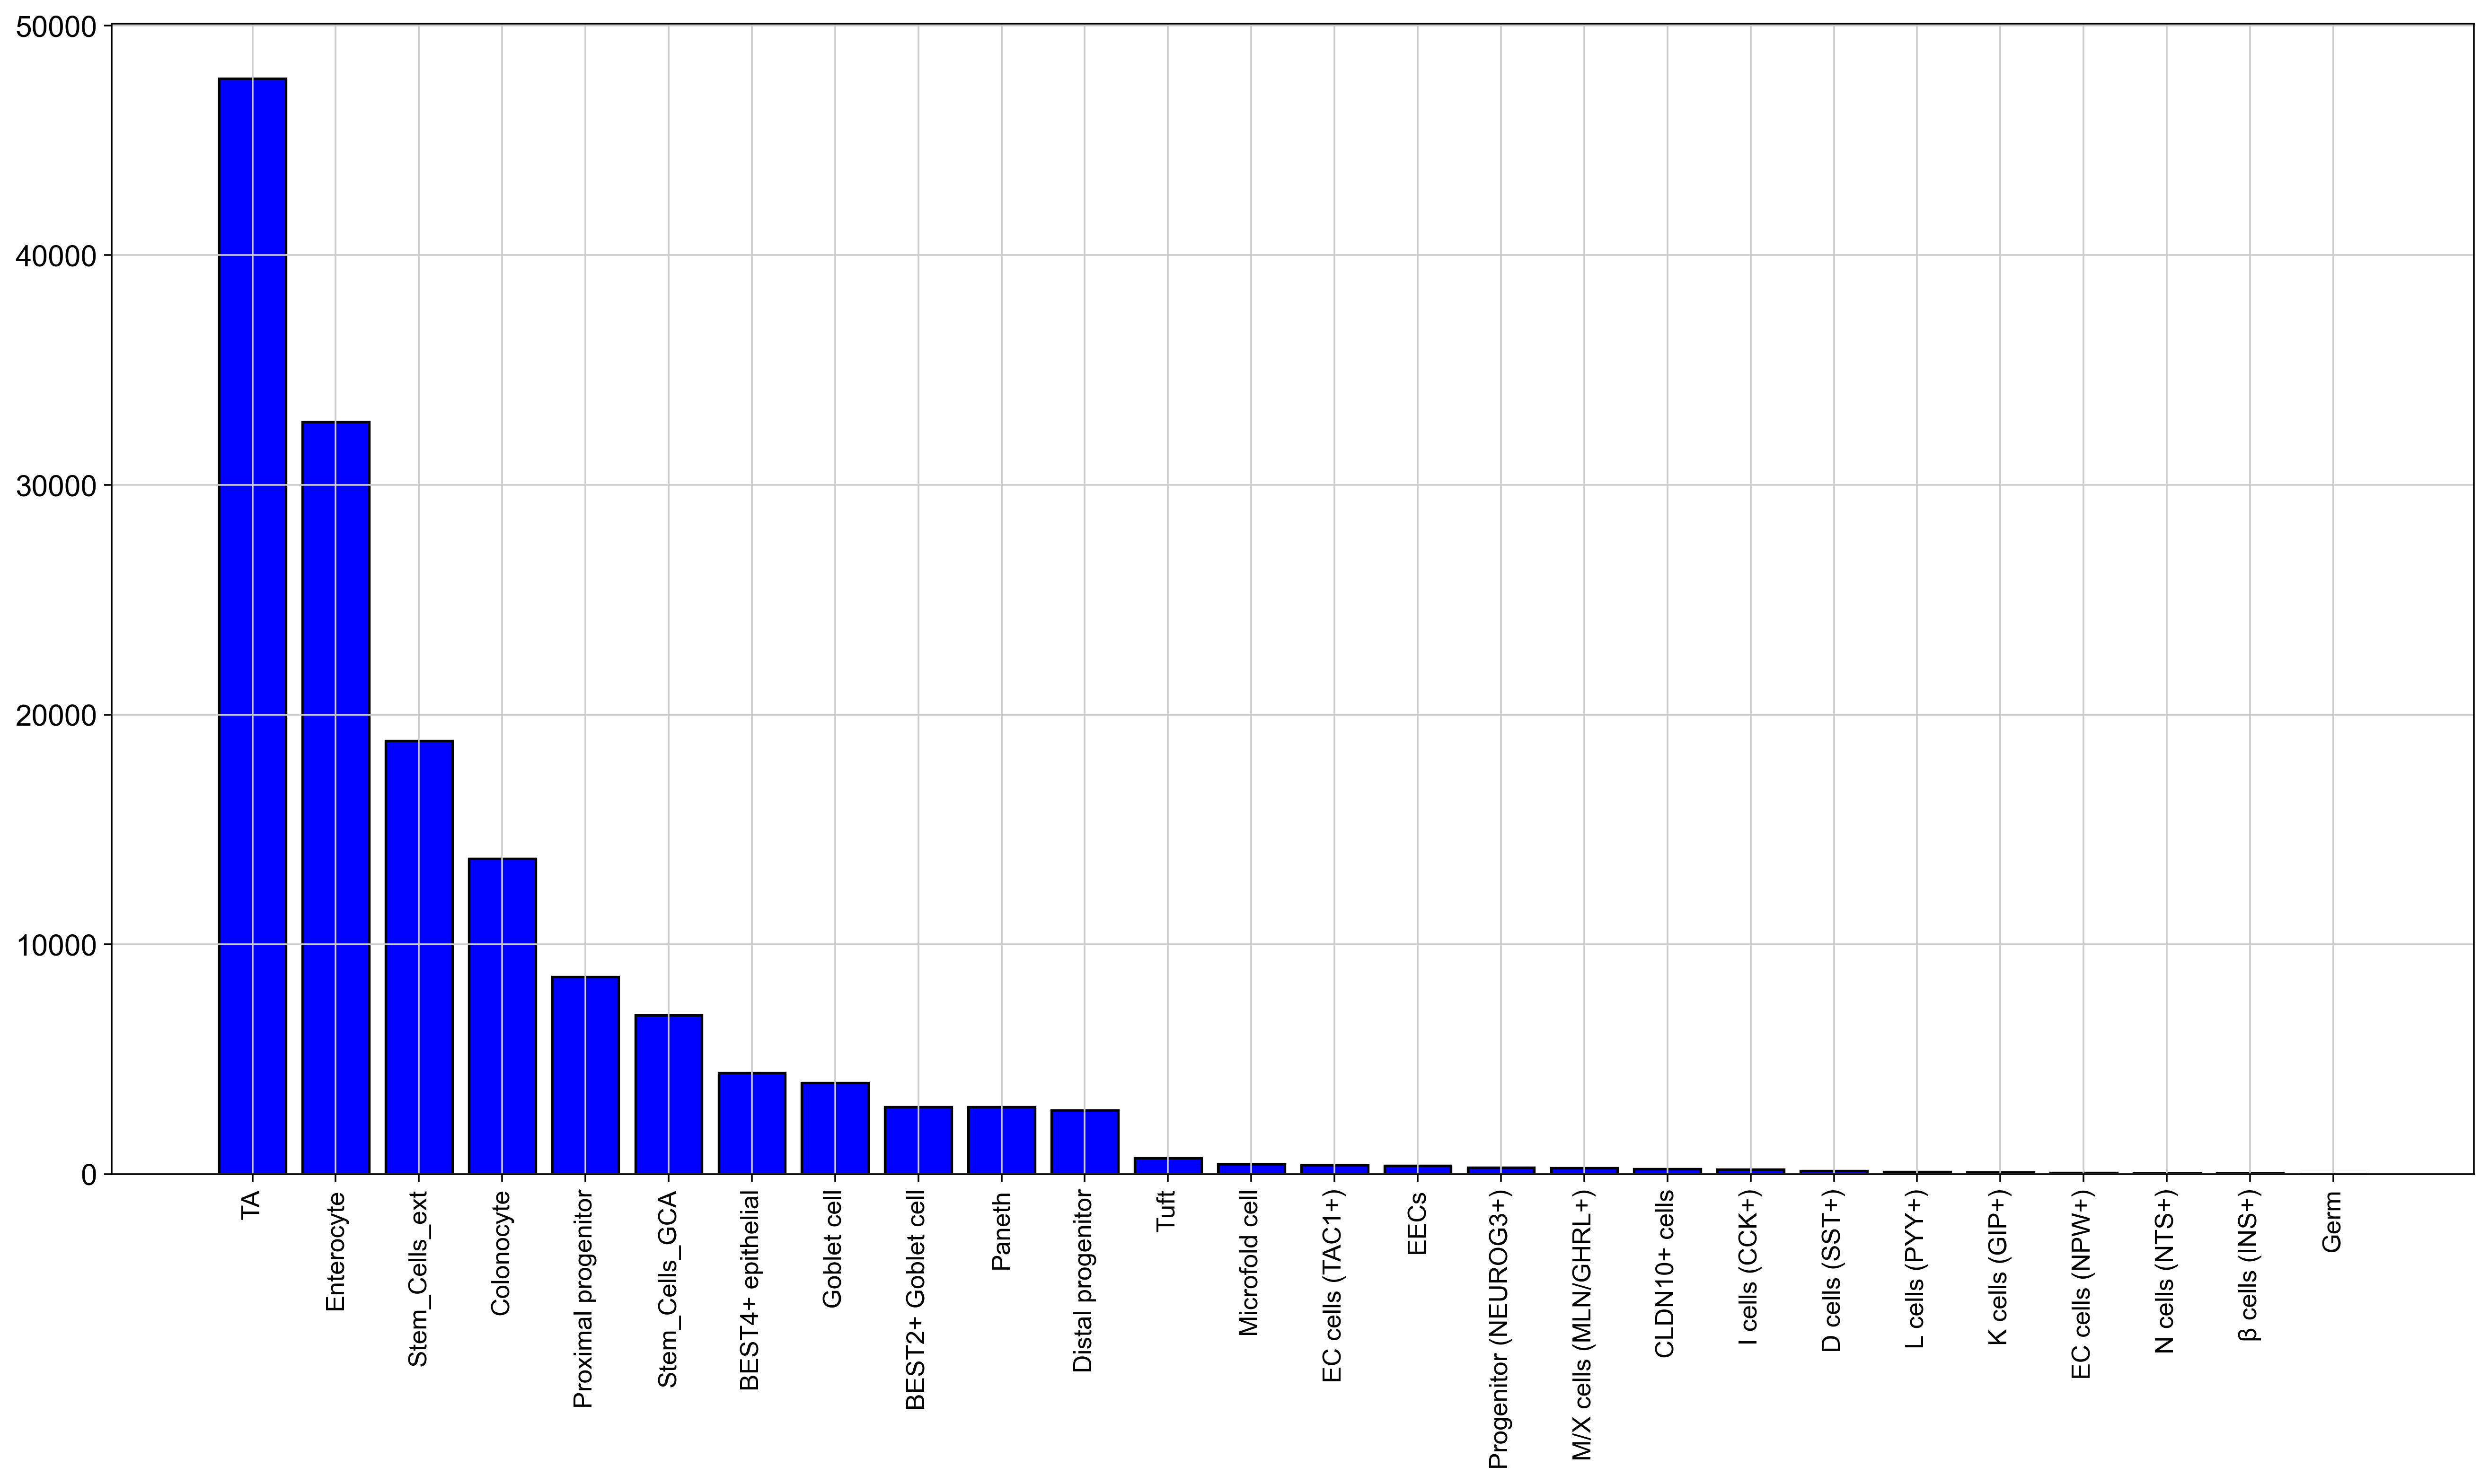

In [37]:
#Create a barplot of the number of cells per cell type in the epithelial_cells_fetal object
plt.figure(figsize = (20, 10))
plt.bar(epithelial_cells.obs["Cell States GCA"].value_counts().index, epithelial_cells.obs["Cell States GCA"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)
matplotlib.pyplot.xticks(rotation = 90, fontsize = 12)

In [38]:
#Combine I cells (CCK+), D cells (SST+), L cells (PYY+), K cells (GIP+), EC cells (NPW+), β cells (INS+) and N cells (NTS+) into one category "rare enteroendocrine cells"
enteroendocrine = ["I cells (CCK+)", "D cells (SST+)", "L cells (PYY+)", "K cells (GIP+)", "EC cells (NPW+)", "β cells (INS+)", "N cells (NTS+)"]
epithelial_cells.obs['Cell States GCA'] = epithelial_cells.obs['Cell States GCA'].replace(enteroendocrine, 'Minor_enteroendocrine_cells')

/var/folders/gb/wwnzrh015q9dns5cmsc3xcjsxglkqz/T/ipykernel_7446/769643355.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  epithelial_cells.obs['Cell States GCA'] = epithelial_cells.obs['Cell States GCA'].replace(enteroendocrine, 'Minor_enteroendocrine_cells')


In [39]:
#Delete Germ cells 
epithelial_cells = epithelial_cells[~epithelial_cells.obs['Cell States GCA'].isin(['Germ']), :]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Enterocyte'),
  Text(2, 0, 'Stem_Cells_ext'),
  Text(3, 0, 'Colonocyte'),
  Text(4, 0, 'Proximal progenitor'),
  Text(5, 0, 'Stem_Cells_GCA'),
  Text(6, 0, 'BEST4+ epithelial'),
  Text(7, 0, 'Goblet cell'),
  Text(8, 0, 'BEST2+ Goblet cell'),
  Text(9, 0, 'Paneth'),
  Text(10, 0, 'Distal progenitor'),
  Text(11, 0, 'Tuft'),
  Text(12, 0, 'Minor_enteroendocrine_cells'),
  Text(13, 0, 'Microfold cell'),
  Text(14, 0, 'EC cells (TAC1+)'),
  Text(15, 0, 'EECs'),
  Text(16, 0, 'Progenitor (NEUROG3+)'),
  Text(17, 0, 'M/X cells (MLN/GHRL+)'),
  Text(18, 0, 'CLDN10+ cells')])

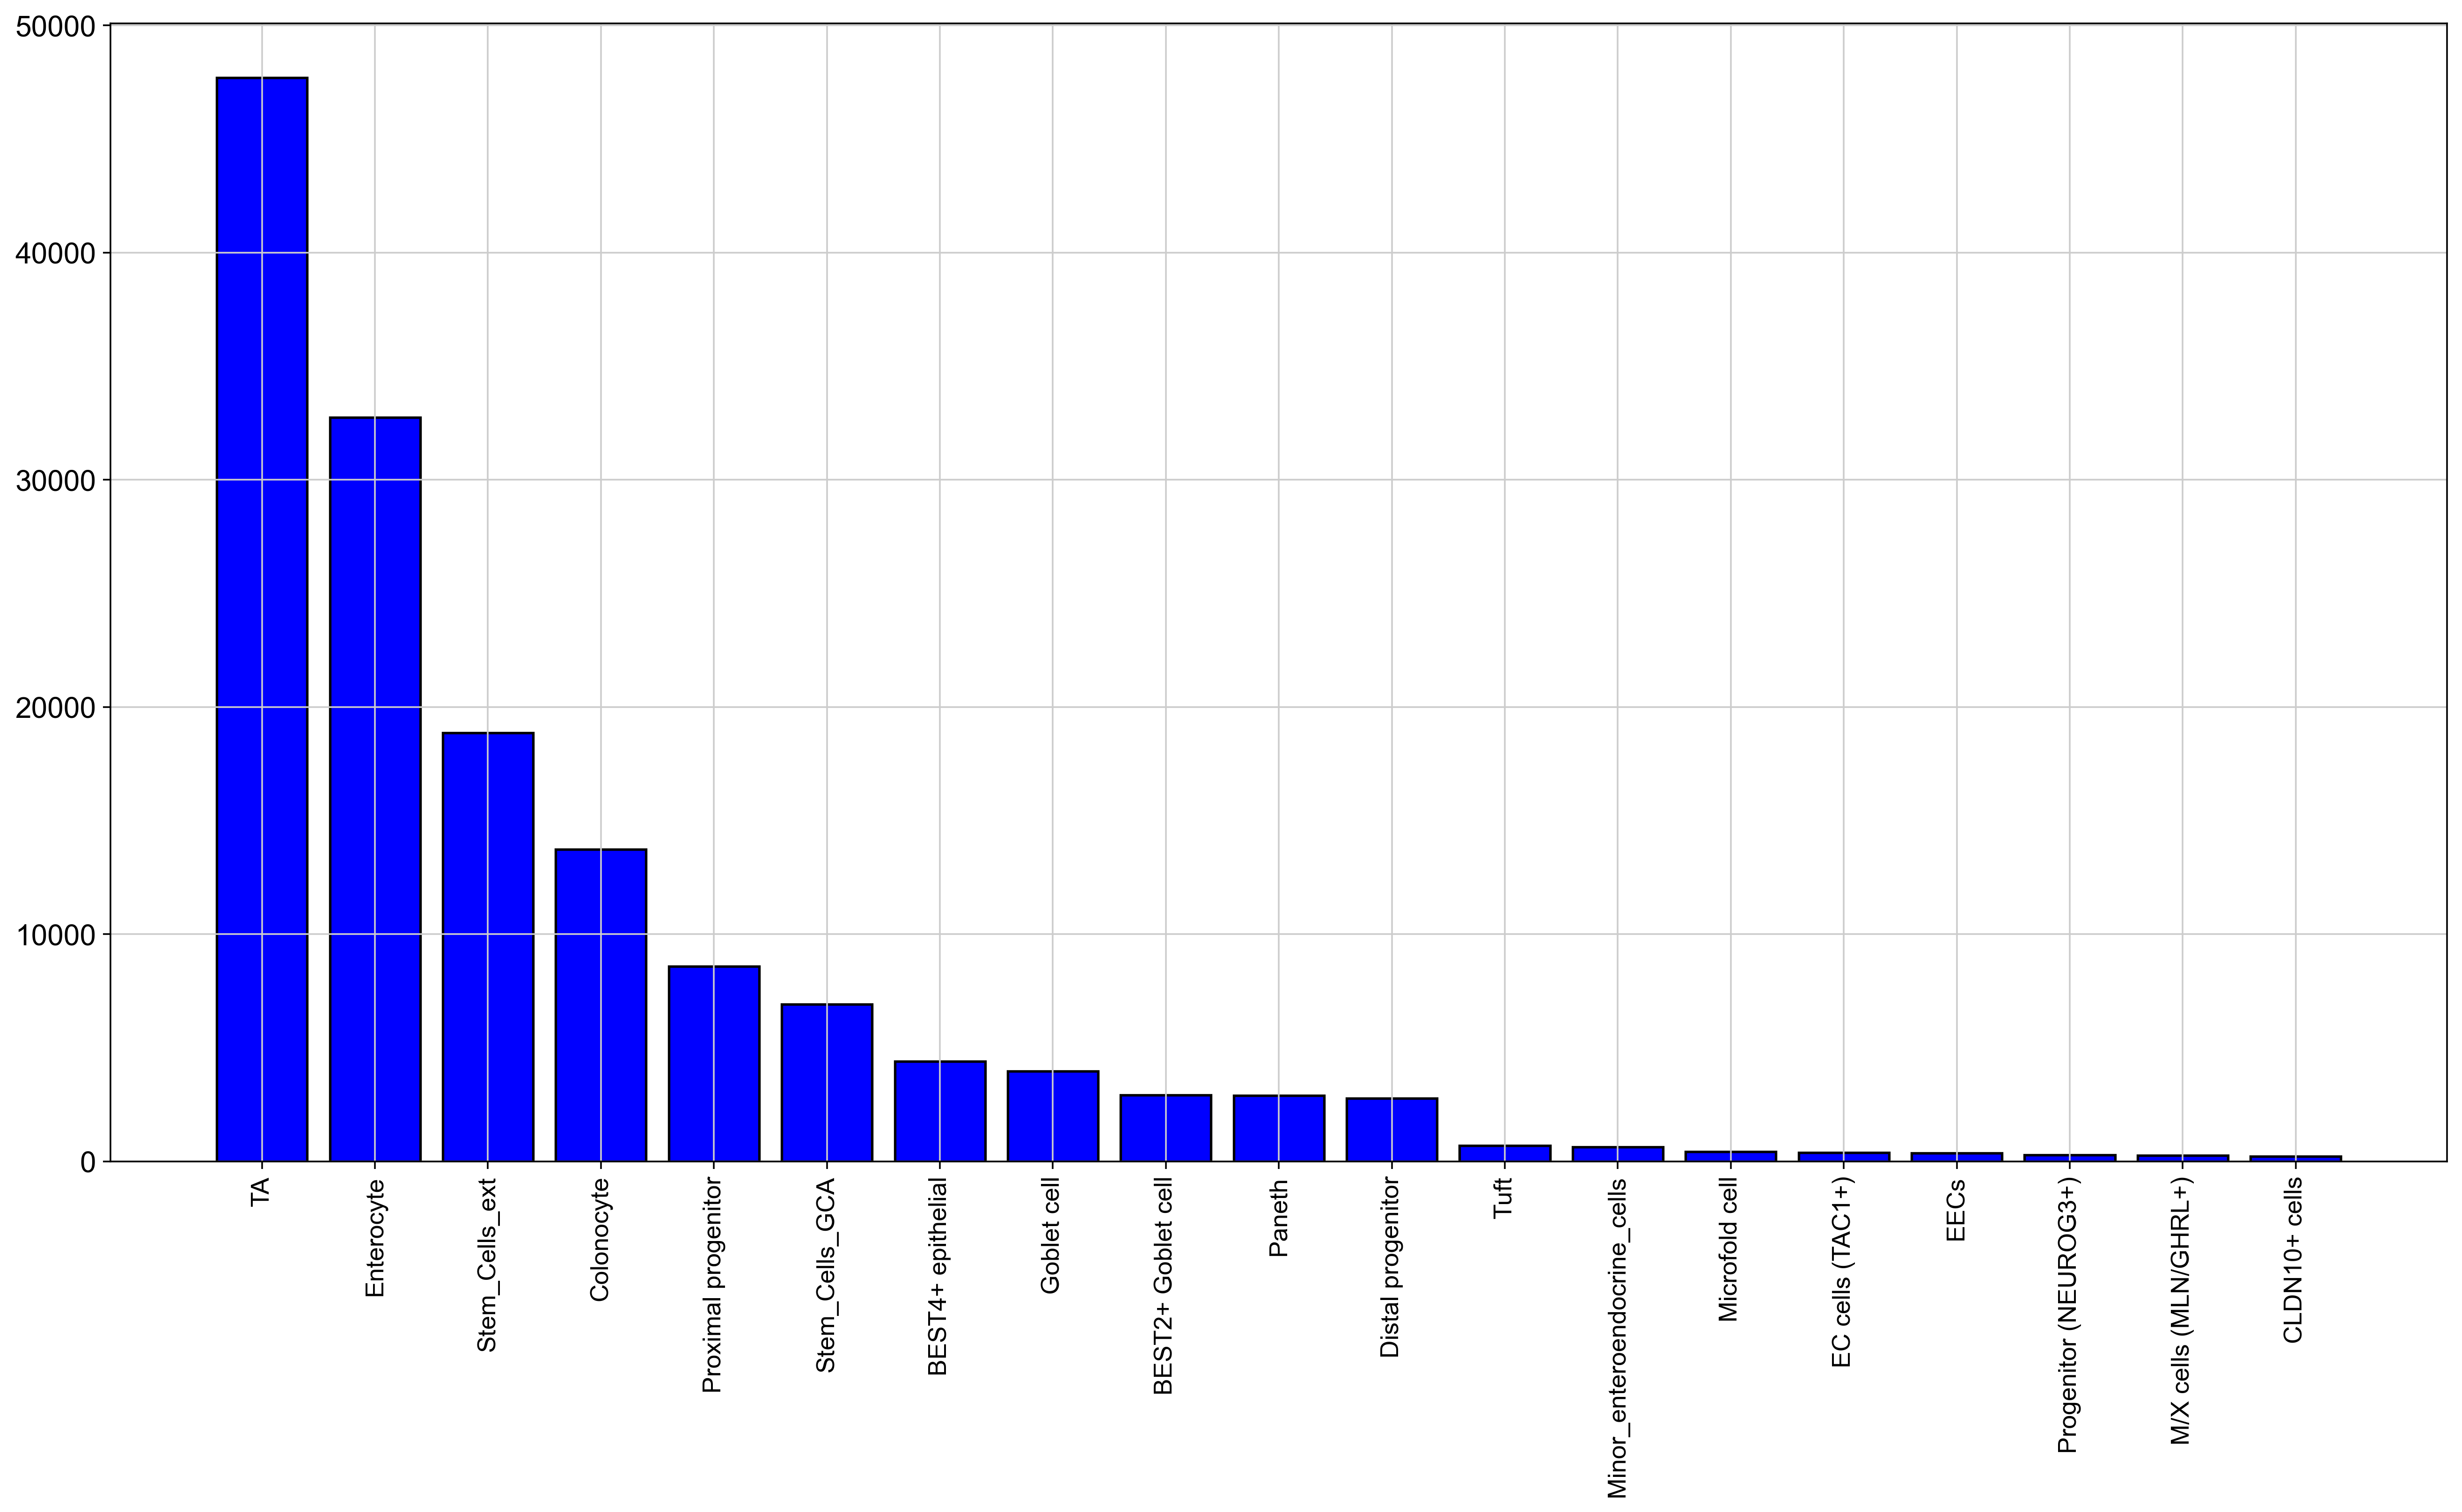

In [40]:
#Create a barplot of the number of cells per cell type in the epithelial_cells_fetal object
plt.figure(figsize = (20, 10))
plt.bar(epithelial_cells.obs["Cell States GCA"].value_counts().index, epithelial_cells.obs["Cell States GCA"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)
matplotlib.pyplot.xticks(rotation = 90, fontsize = 12)

In [41]:
epithelial_cells.obs['Cell States GCA'].value_counts()

TA                             47700
Enterocyte                     32745
Stem_Cells_ext                 18868
Colonocyte                     13729
Proximal progenitor             8580
Stem_Cells_GCA                  6909
BEST4+ epithelial               4400
Goblet cell                     3965
BEST2+ Goblet cell              2925
Paneth                          2911
Distal progenitor               2775
Tuft                             688
Minor_enteroendocrine_cells      629
Microfold cell                   430
EC cells (TAC1+)                 387
EECs                             371
Progenitor (NEUROG3+)            292
M/X cells (MLN/GHRL+)            268
CLDN10+ cells                    223
Name: Cell States GCA, dtype: int64

### Subset data with `geosketch`

In [42]:
#Extract epithelial and plasma cells from the anndata_adult object
TA = epithelial_cells[epithelial_cells.obs["Cell States GCA"].isin(['TA']), :]
Enterocyte = epithelial_cells[epithelial_cells.obs["Cell States GCA"].isin(['Enterocyte']), :]
Colonocyte = epithelial_cells[epithelial_cells.obs["Cell States GCA"].isin(['Colonocyte']), :]
Stem = epithelial_cells[epithelial_cells.obs["Cell States GCA"].isin(['Stem_Cells_ext']), :]

In [43]:
sc.pp.pca(TA)
sc.pp.pca(Enterocyte)

computing PCA
    with n_comps=50
    finished (0:00:18)
computing PCA
    with n_comps=50
    finished (0:00:21)


In [44]:
sc.pp.pca(Colonocyte)

computing PCA
    with n_comps=50
    finished (0:00:14)


In [45]:
sc.pp.pca(Stem)

computing PCA
    with n_comps=50
    finished (0:00:17)


In [46]:
N = 10000
sketch_index_TA = gs(TA.obsm['X_pca'], N, replace = False)
sketch_index_Enterocyte = gs(Enterocyte.obsm['X_pca'], N, replace = False)
sketch_index_Colonocyte = gs(Colonocyte.obsm['X_pca'], N, replace = False)

In [47]:
N = 6909
sketch_index_Stem = gs(Stem.obsm['X_pca'], N, replace = False)

In [48]:
#Subset cells according to the sketch index
subset_TA = TA[TA.obs_names[sketch_index_TA]]
subset_Enterocyte = Enterocyte[Enterocyte.obs_names[sketch_index_Enterocyte]]
subset_Colonocyte = Colonocyte[Colonocyte.obs_names[sketch_index_Colonocyte]]
subset_Stem = Stem[Stem.obs_names[sketch_index_Stem]]

In [56]:
# Drop TA, Enterocyte and Plasma cells from the anndata_adult object
epithelial_cells_subset = epithelial_cells[~epithelial_cells.obs['Cell States GCA'].isin(['TA', 'Enterocyte', 'Colonocyte', 'Stem_Cells_ext']), :]

In [57]:
# Concatenate the subset of TA, Enterocyte and Colonocyte cells with the epithelial_cells_subset
epithelial_cells_subset = ad.concat([epithelial_cells_subset, subset_TA, subset_Enterocyte, subset_Colonocyte, subset_Stem])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Colonocyte'),
  Text(1, 0, 'Enterocyte'),
  Text(2, 0, 'TA'),
  Text(3, 0, 'Proximal progenitor'),
  Text(4, 0, 'Stem_Cells_GCA'),
  Text(5, 0, 'Stem_Cells_ext'),
  Text(6, 0, 'BEST4+ epithelial'),
  Text(7, 0, 'Goblet cell'),
  Text(8, 0, 'BEST2+ Goblet cell'),
  Text(9, 0, 'Paneth'),
  Text(10, 0, 'Distal progenitor'),
  Text(11, 0, 'Tuft'),
  Text(12, 0, 'Minor_enteroendocrine_cells'),
  Text(13, 0, 'Microfold cell'),
  Text(14, 0, 'EC cells (TAC1+)'),
  Text(15, 0, 'EECs'),
  Text(16, 0, 'Progenitor (NEUROG3+)'),
  Text(17, 0, 'M/X cells (MLN/GHRL+)'),
  Text(18, 0, 'CLDN10+ cells')])

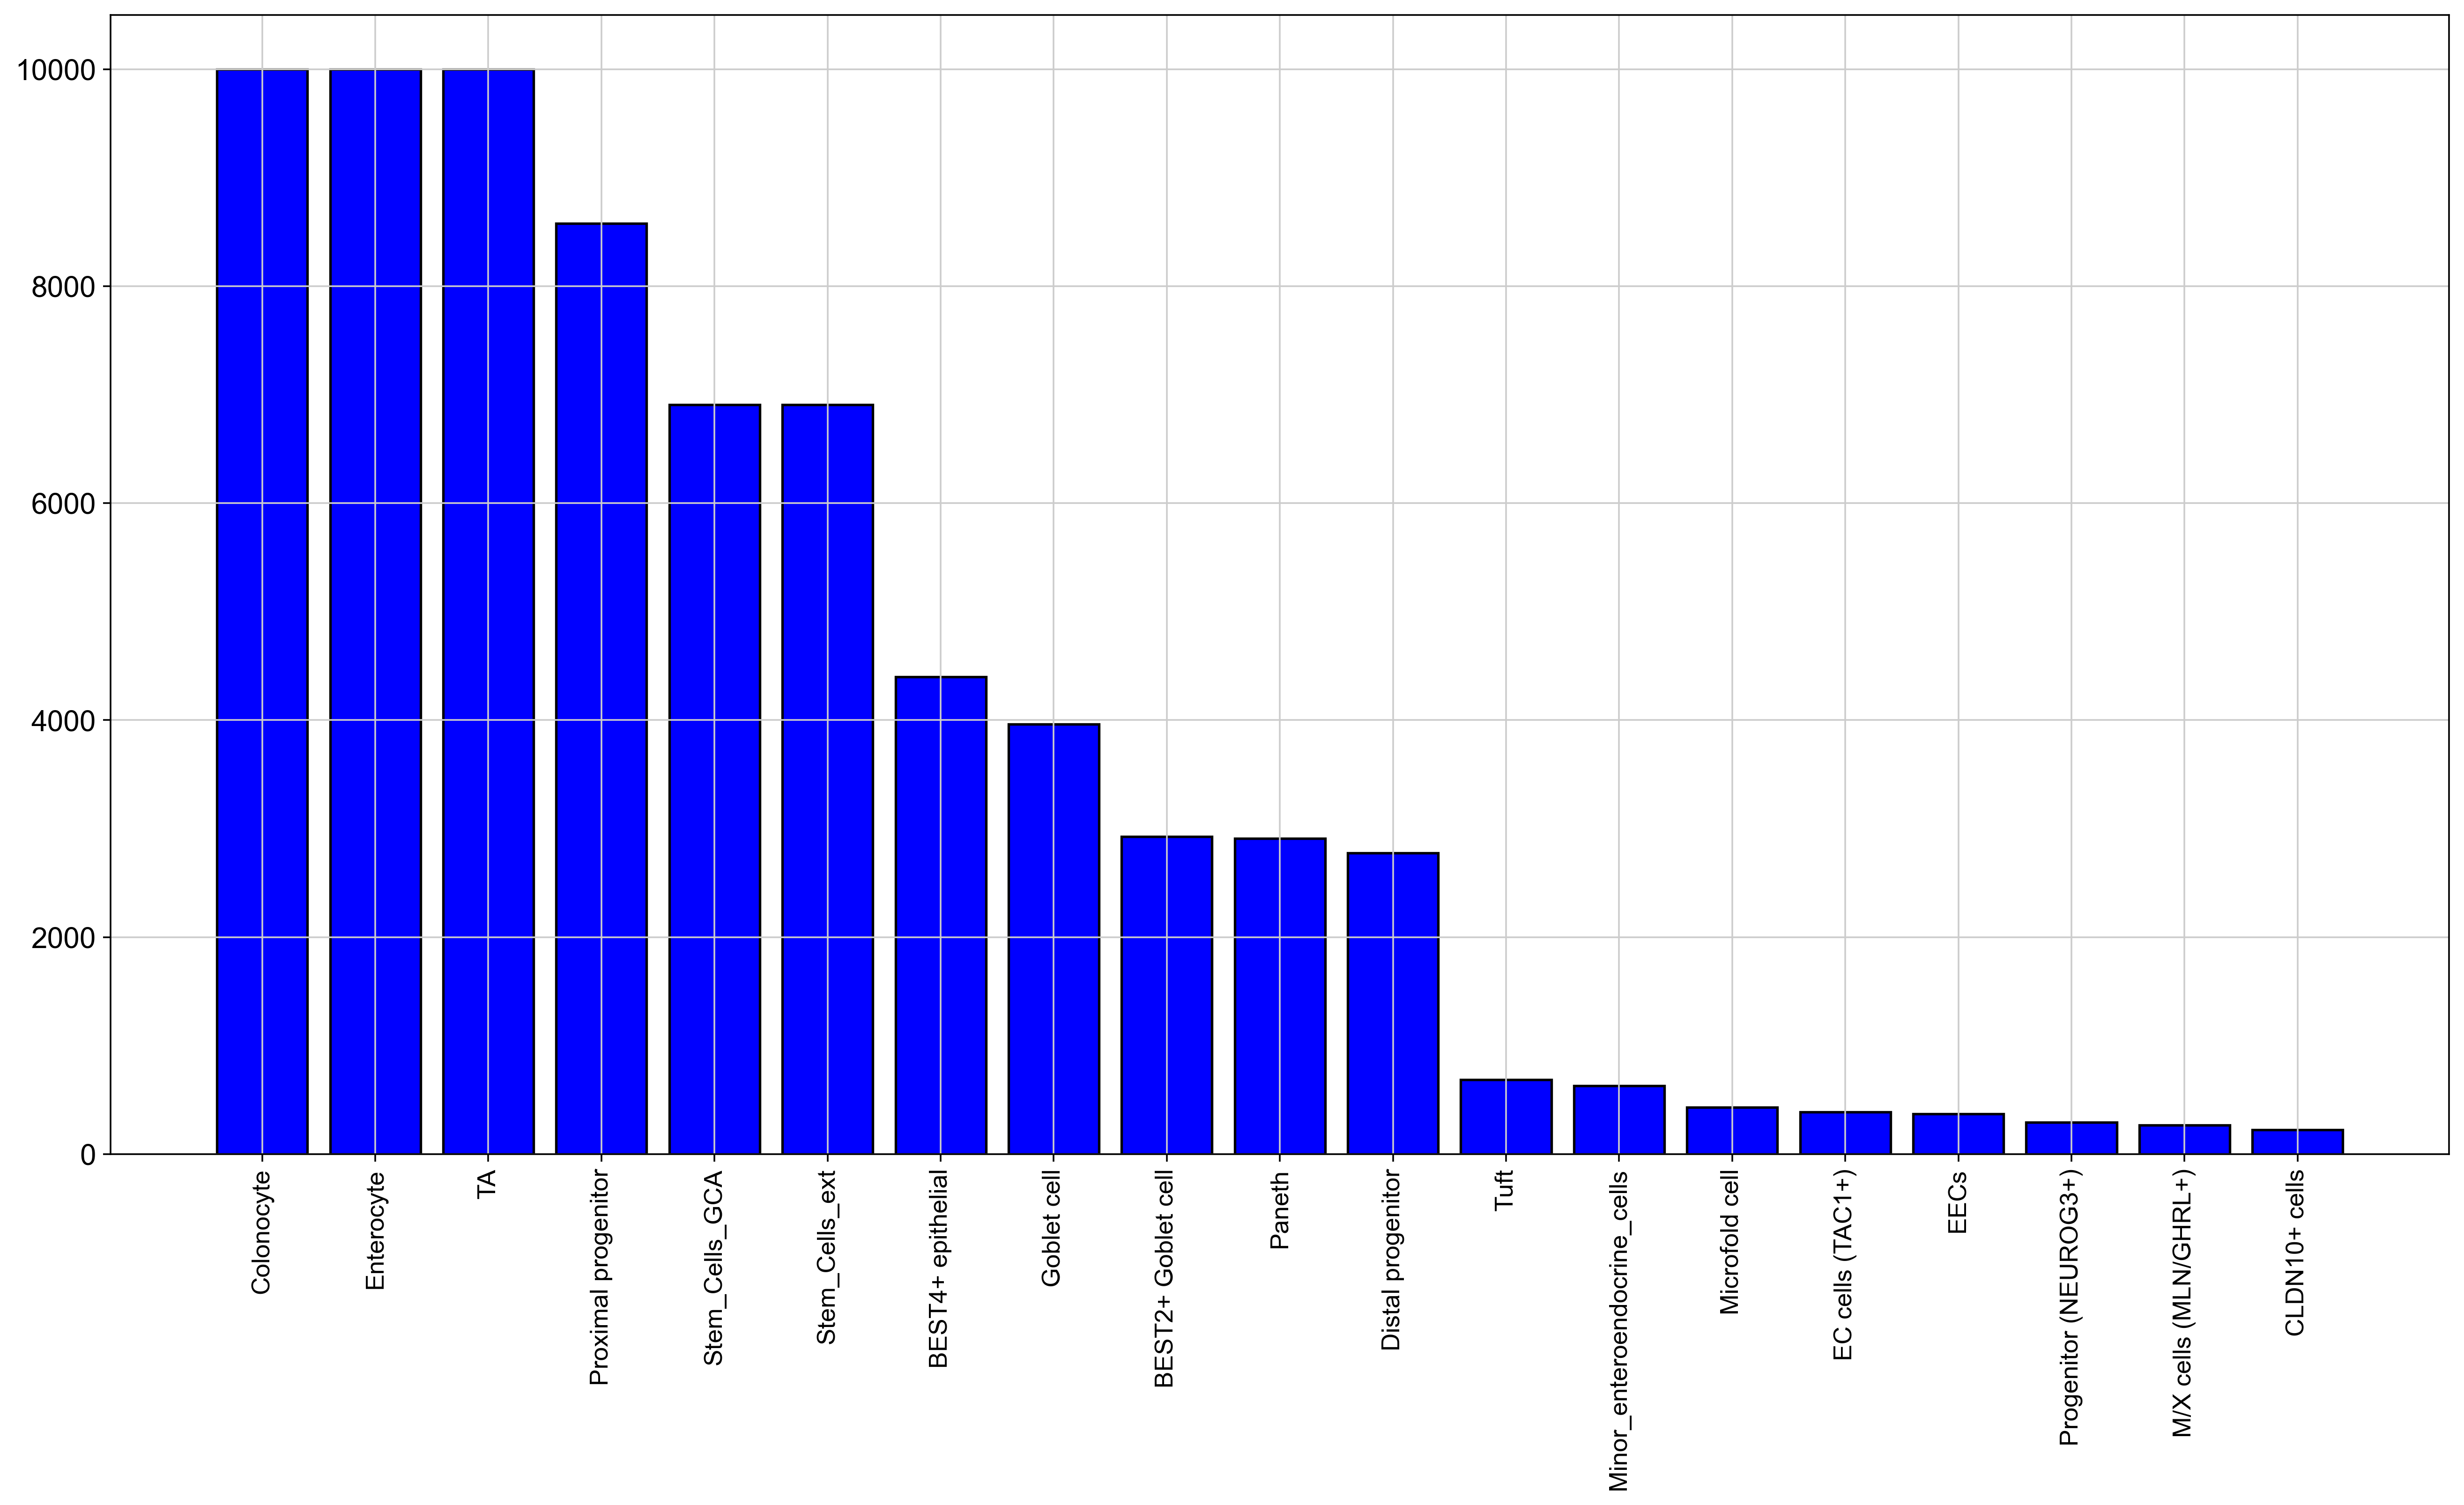

In [58]:
#Create a barplot of the number of cells per cell type in the epithelial_cells_fetal object
plt.figure(figsize = (20, 10))
plt.bar(epithelial_cells_subset.obs["Cell States GCA"].value_counts().index, epithelial_cells_subset.obs["Cell States GCA"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)
matplotlib.pyplot.xticks(rotation = 90, fontsize = 12)

In [59]:
#Save the anndata_subset object - local machine path
epithelial_cells_subset.write('/Users/anna.maguza/Desktop/Data/Processed_datasets/Geosketch_subsets/Epithelial_cells/Epithelial_cells_Geosketch_subset_reference_with_Kong.h5ad')

In [60]:
#Drop the anndata_subset object from the anndata object 
query_object = epithelial_cells[~epithelial_cells.obs_names.isin(epithelial_cells_subset.obs_names), :]

([0, 1, 2, 3],
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Enterocyte'),
  Text(2, 0, 'Stem_Cells_ext'),
  Text(3, 0, 'Colonocyte')])

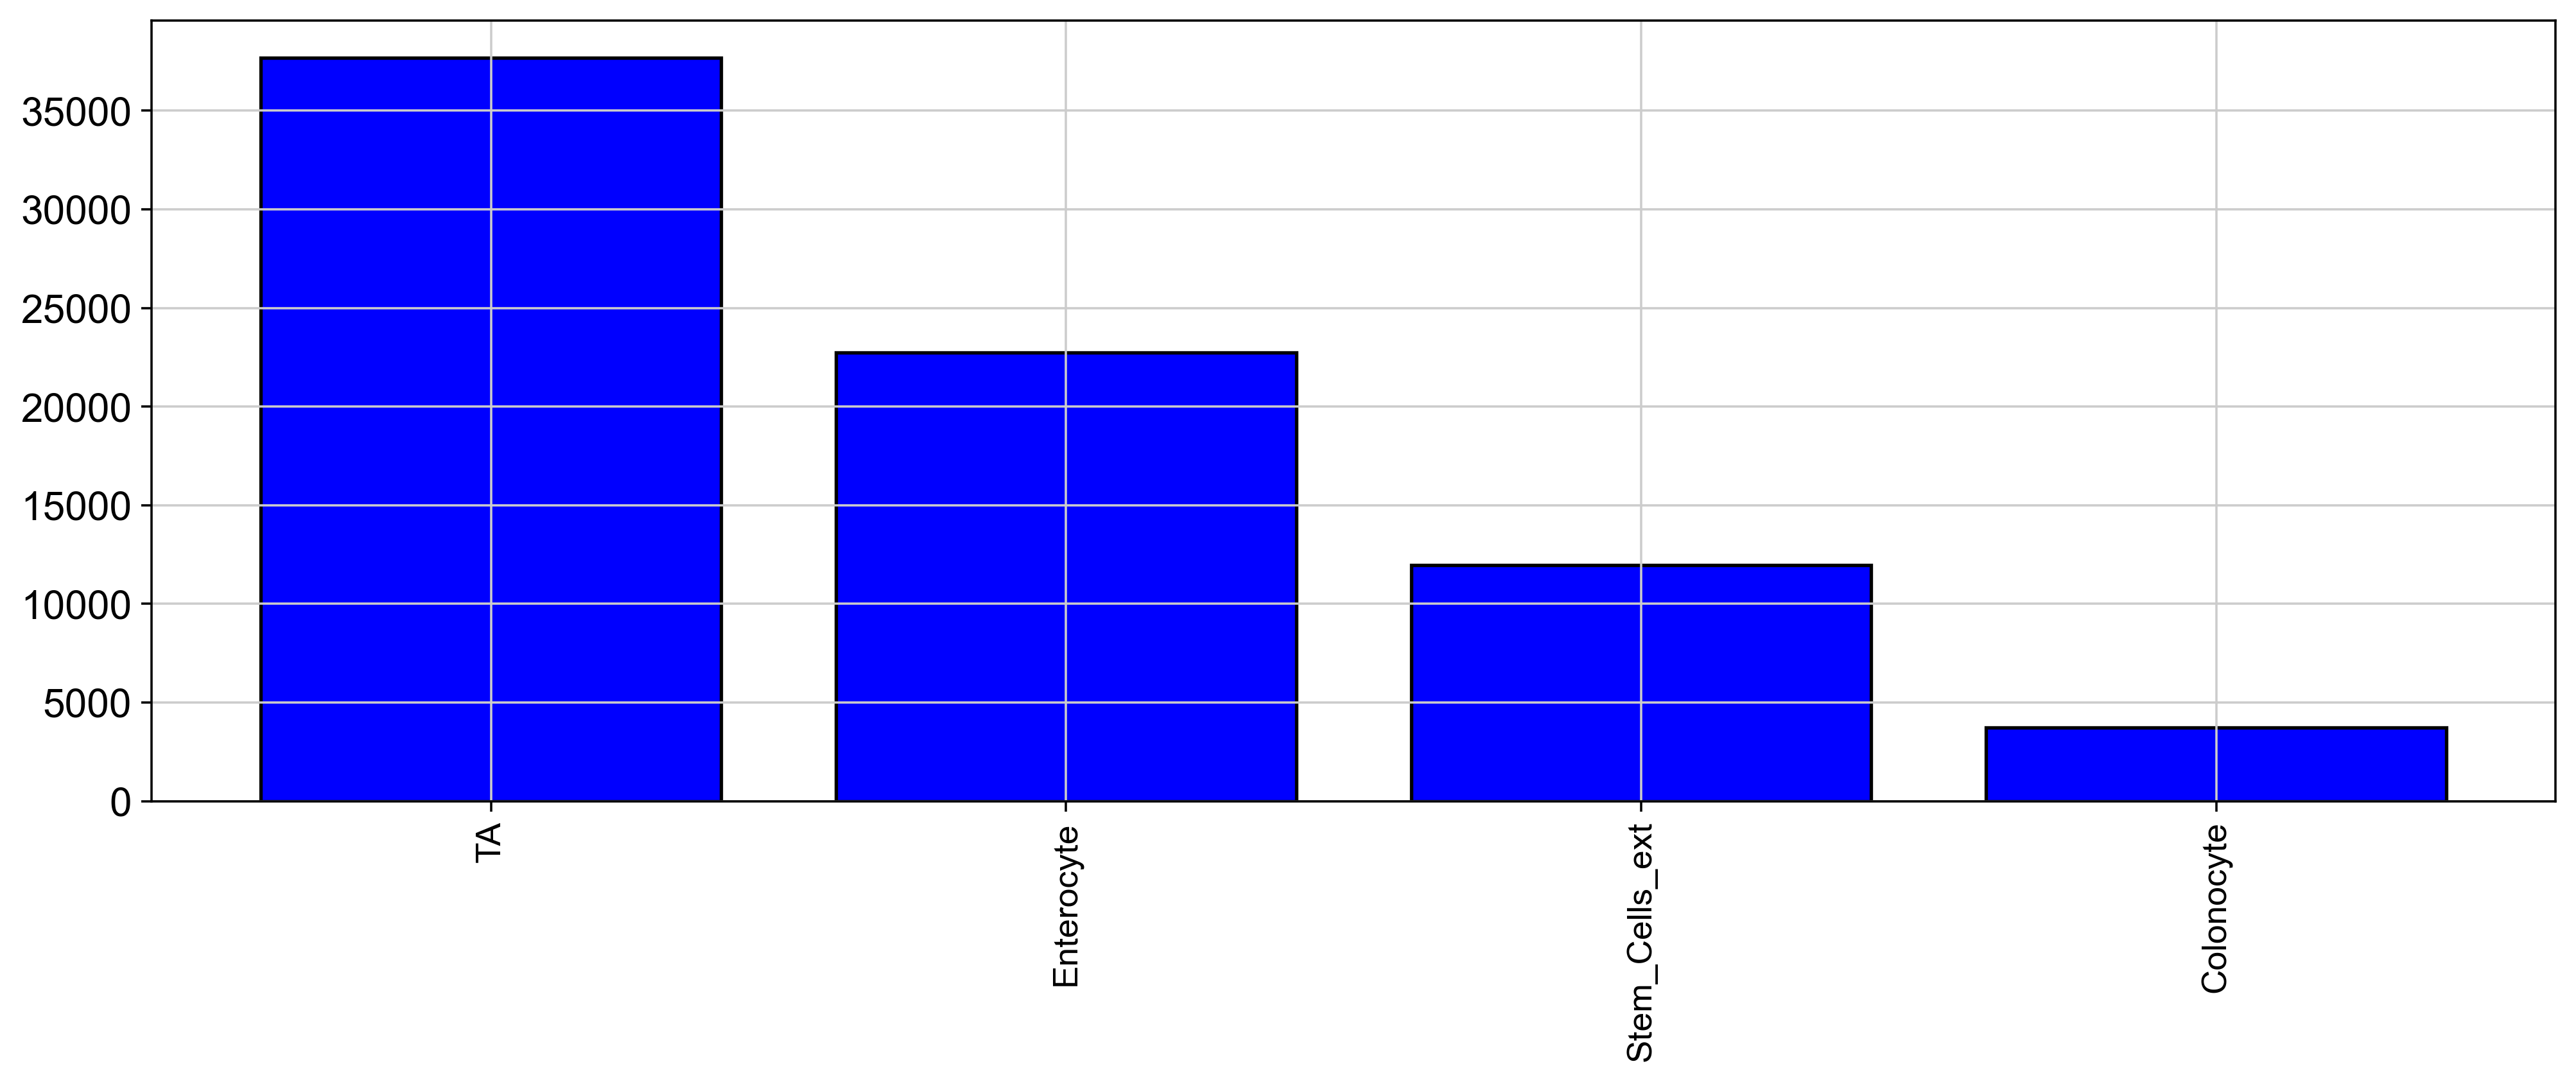

In [61]:
#Create a barplot of the number of cells per cell type in the anndata_pediatric object
plt.figure(figsize = (15, 5))
plt.bar(query_object.obs['Cell States GCA'].value_counts().index, query_object.obs["Cell States GCA"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)
matplotlib.pyplot.xticks(rotation = 90, fontsize = 12)

In [62]:
#Save the query_object object - local machine path
query_object.write('/Users/anna.maguza/Desktop/Data/Processed_datasets/Geosketch_subsets/Epithelial_cells/Epithelial_cells_Geosketch_subset_query_with_Kong.h5ad')